rust: [[1.23976e+05 1.38000e+02 1.26000e+02 1.59036e+06]
 [1.01700e+04 0.00000e+00 1.60000e+01 4.56264e+05]
 [4.44700e+03 0.00000e+00 1.10000e+01 4.17640e+05]]
c: [[8.42860e+04 2.67500e+03 2.03180e+04 3.22496e+05]
 [4.02000e+03 2.00000e+02 0.00000e+00 7.49190e+04]
 [2.28500e+03 1.60000e+01 1.00000e+01 6.19200e+04]]


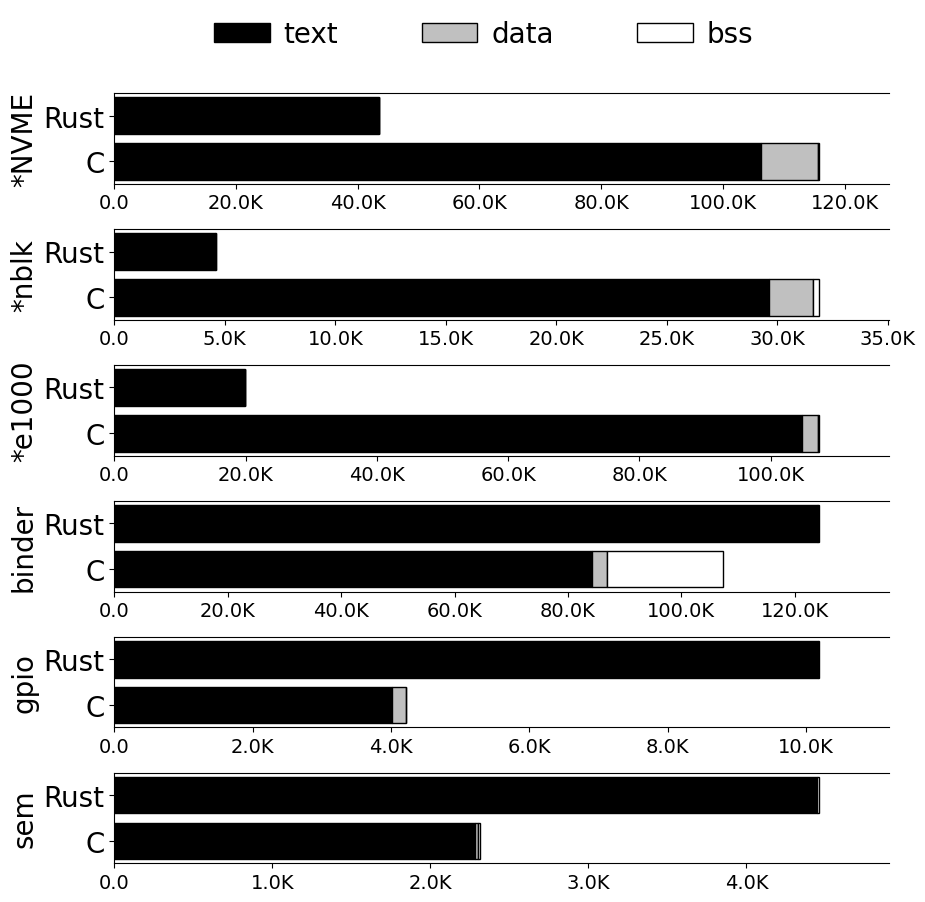

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

bar_conf = dict(edgecolor='black', linewidth=1)

once_legend = 0
def comma_formatter(x, pos):
    if abs(x) >= 1e9:
        return '{:.1f}B'.format(x / 1e9)
    elif abs(x) >= 1e6:
        return '{:.1f}M'.format(x / 1e6)
    elif abs(x) >= 1e3:
        return '{:.1f}K'.format(x / 1e3)
    else:
        return '{:.1f}'.format(x)

data = "43540/72566+33753         &  0/8604+757    &   40/84+15    &    290991/203410+94710              &    385510/88427+58087       &    37633/0                     &    231179/0        &    26.609/32.888 &\
  4579/29646                &  16/1956       &   10/279      &    107126/80078                     &    199426/45836             &    32992/0                     &    116277/0        &    5.420/7.056 &\
 19914/104721              &  0/2564        &   16/64       &    233886/358613                    &    303755/96936             &    22288/0                     &    204045/0        &    7.798/46.948 &\
  123976/84286               &  138/2675        &   126/20318    &    751885/126699+43296+47551        &    838475/47377+26141+31432 &    188850/0                     &    310961/0        &    9.002/9.418 &\
  10170/4020                &  0/200         &   16/0        &    179053/36617                     &    277211/38302             &    17446/0                     &    191690/0        &    8.251/7.378 &\
4447/2285                 &  0/16          &   11/10       &    179053/36617                     &    238587/25303             &    178360/0                    &    8704/0          &    18.496/19.496"
data = data.split('&')
rust = []
c = []
for d in data:
    d = d.strip().split('/')
    rust.append(eval(d[0]))
    c.append(eval(d[1]))

rust = np.array(rust).reshape(6,8)[:,:5]
c = np.array(c).reshape(6,8)[:,:5]
rust_column = np.sum(rust[:,3:5], axis=1)
c_column = np.sum(c[:,3:5], axis=1)
rust = np.column_stack((rust[:,:3], rust_column))
c = np.column_stack((c[:,:3], c_column))
print(f'rust: {rust[-3:]}')
print(f'c: {c[-3:]}')

driver_name = ['*NVME', '*nblk', '*e1000', 'binder', 'gpio', 'sem']
binary_size = ['text', 'data', 'bss', 'debug']
color = ['black', 'silver', 'white', 'white']
hatch = ['', '', '', '//']

fig, axs = plt.subplots(6,1,dpi=100, sharey=True, figsize=(10,10))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
labels = ['C','Rust']
y_pos = np.arange(len(labels))
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

x_lim_end_c = max(sum(i[1:3]) for i in c)
x_lim_end_rust = max(sum(i[1:3]) for i in rust)
x_lim_end = max(x_lim_end_c, x_lim_end_rust)
x_lim_c = max((i[0] for i in c))
x_lim_rust = max((i[0] for i in rust))
x_lim = max(x_lim_c, x_lim_rust)
for i in range(6):
    # sum_c = np.sum(c[i][:3])
    # sum_rust = np.sum(rust[i][:3])
    # x_lim = max(sum_c, sum_rust)
    cur_x_lim = max(sum(c[i][:3]), sum(rust[i][:3])) * 1.1
    axs[i].set_xlim(0, cur_x_lim)
    # cur_x_lim_end = max(sum(c[i][1:3]), sum(rust[i][1:3]))
    # print(i, cur_x_lim_end)
    # axs[i,1].set_xlim(0, cur_x_lim_end * 1.1)
    axs[i].set_yticks(y_pos, labels=labels, size=20)
    axs[i].set_ylabel(driver_name[i], size=20)
    axs[i].spines['right'].set_visible(False)
    # axs[i,1].spines['left'].set_visible(False)
    # axs[i,1].get_yaxis().set_visible(False)
    # axs[i].plot([1, 1], [1, 0], transform=axs[i,0].transAxes, **kwargs)
    # axs[i,1].plot([0, 0], [0, 1], transform=axs[i,1].transAxes, **kwargs)
    # for j in range(1):
    left = np.zeros(2)
    ax = axs[i]
    ax.tick_params(axis='x',rotation=0, labelsize=14)
    # if j == 0:
    ax.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
    # else:
    #     ax.xaxis.set_major_formatter(FuncFormatter(comma_formatter_1))
    for k in range(3):
        # if j == 0 and k >= 1:
        #     break
        
        # if j == 0 and k == 0 :
        if once_legend != 3:
            once_legend += 1
            ax.barh(y_pos, [c[i][k],rust[i][k]], label = binary_size[k], left=left, color = color[k], hatch=hatch[k], **bar_conf)
        else:
            ax.barh(y_pos, [c[i][k],rust[i][k]], left=left, color = color[k], hatch=hatch[k], **bar_conf)
            # ax.barh(y_pos, [c[i][k],rust[i][k]], label = binary_size[k], left=left)
        left += [c[i][k],rust[i][k]]
        # elif j == 1 and k >= 1:
        #     if once_legend != 2:
        #         once_legend += 1
        #         ax.barh(y_pos, [c[i][k],rust[i][k]], color = color[k], label = binary_size[k], left=left, hatch=hatch[k], **bar_conf)
        #     else:
        #         ax.barh(y_pos, [c[i][k],rust[i][k]], color = color[k],  left=left, hatch=hatch[k], **bar_conf)
        #     left += [c[i][k],rust[i][k]]
        # ax.label_outer()

fig.legend( ncol=4, frameon=False, loc="lower left", bbox_to_anchor=(0.2, 0.9), fontsize=20, columnspacing=3, handletextpad=0.5)
# fig.tight_layout(pad=0.5)
fig.savefig('./figure8_1.pdf', bbox_inches="tight")

In [14]:
for i in range(len(rust)):
    print(f"{driver_name[i]:<10} {sum(rust[i][:3]):<10} {sum(c[i][:3]):>}")

*NVME      43580.0    115779.0
*nblk      4605.0     31881.0
*e1000     19930.0    107349.0
binder     124240.0   107279.0
gpio       10186.0    4220.0
sem        4458.0     2311.0
